In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.plotting.register_matplotlib_converters()
import seaborn as sns

print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
# It's so important which we use version when analiyzing.

Pandas version: 1.4.0
Numpy version: 1.22.1


# Reading the data

In [52]:
data = pd.read_csv("/Users/barborostasdemir/Desktop/Lionel Messi vs Cristiano Ronaldo Club Goals/messi.csv")
# we are pulling our csv file from the file path using "pd_csv".

# We are looking data

In [86]:
data.shape
#We learn the format of the data set

(1399, 14)

In [87]:
data.head(10)
#We bring the top 10 values

,Player,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,Cristiano Ronaldo,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,Cristiano Ronaldo,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,Cristiano Ronaldo,02/03,Liga Portugal,8,2002-10-26,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,Cristiano Ronaldo,02/03,Taca de Portugal Placard,Fourth Round,2002-11-24,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,Cristiano Ronaldo,02/03,Taca de Portugal Placard,Fifth Round,2002-12-18,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN
5,Cristiano Ronaldo,03/04,Premier League,11,2003-11-01,H,Manchester United,Portsmouth FC,3:00,RW,80,2:00,Direct free kick,NaN
6,Cristiano Ronaldo,03/04,FA Cup,Fifth Round,2004-02-14,H,Manchester United,Manchester City,4:02,RW,74,3:00,Right-footed shot,NaN
7,Cristiano Ronaldo,03/04,Premier League,29,2004-03-20,H,Manchester United,Tottenham Hotspur,3:00,NaN,89,2:00,Right-footed shot,NaN
8,Cristiano Ronaldo,03/04,Premier League,32,2004-04-10,A,Manchester United,Birmingham City,1:02,NaN,60,1:01,Header,Ryan Giggs
9,Cristiano Ronaldo,03/04,Premier League,38,2004-05-15,A,Manchester United,Aston Villa,0:02,NaN,4,0:01,Right-footed shot,NaN


In [88]:
data.tail(3)
#we bring the last 3 values

,Player,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
1396,Lionel Messi,22/23,UEFA Champions League,Group Stage,2022-10-25,H,Paris Saint-Germain,Maccabi Haifa,7:2,SS,19,1:0,Left-footed shot,Kylian Mbappe
1397,Cristiano Ronaldo,22/23,Europa League,Group Stage,2022-10-27,H,Manchester United,FC Sheriff,3:0,CF,81,3:0,Left-footed shot,NaN
1398,Lionel Messi,22/23,Ligue 1,13,2022-10-29,H,Paris Saint-Germain,ESTAC Troyes,4:3,RW,55,2:2,Left-footed shot,Sergio Ramos


In [55]:
data.describe()
#we define the values of the "data" set

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
count,698,698,698,698,698,698,698,698,698,698,698,697,485
unique,19,10,48,449,2,2,94,52,9,96,43,12,67
top,11-Dec,LaLiga,Group Stage,03/07/12,H,FC Barcelona,Sevilla FC,4:00,CF,55,1:00,Left-footed shot,Luis Suarez
freq,73,474,80,5,416,672,38,47,273,14,98,433,48


In [99]:
data["Season"].value_counts()
# How many oa in each season. we can check that he has a condition.

11/12    133
14/15    119
12/13    115
10/11    106
16/17     96
13/14     92
15/16     92
17/18     89
09/10     80
18/19     79
20/21     74
19/20     68
08/09     64
07/08     58
06/07     40
21/22     38
05/06     20
22/23     15
04/05     10
03/04      6
02/03      5
Name: Season, dtype: int64

In [100]:
data.isnull().sum()

Player                0
Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position     58
Minute                0
At_score              0
Type                 16
Goal_assist         455
dtype: int64

* We can see data gaps here in case you are not playing.

## Let's find out which clubs are connected to which players who play in their favorite playing position

In [56]:
data['Playing_Position'].replace(['AM ', 'RW ', 'CF ', 'SS '], ['AM', 'RW', 'CF', 'SS'], inplace= True)
# we change the values that need to be changed using the "replace" method.

array(['CF', 'RW', 'LW', 'SS', 'AM'], dtype=object)

In [90]:
data['Playing_Position'].unique()
#We have called values that do not fall into repetition.

array(['LW', nan, 'RW', 'CF', 'SS', 'LW ', 'CF ', 'AM', 'RW ', 'AM ',
       'SS '], dtype=object)

In [57]:
data.groupby('Playing_Position').size().reset_index()
#It is used to reset the index or a level

,Playing_Position,0
0,AM,15
1,CF,313
2,LW,1
3,RW,316
4,SS,53


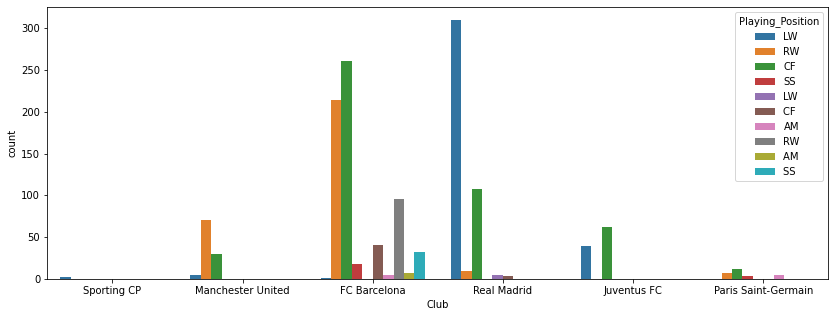

In [93]:
#Favorite game position played by the player in each club
plt.figure(figsize=(14,5))
sns.countplot(x='Club', hue = 'Playing_Position',data=data);

- Messi has chosen the "RW-CF" positions the most in both clubs.

# The player performance on creating goals over his career and the type of goal he makes

In [94]:
#minor data cleaning, two seasons are differently named
data['Season'].unique()
data['Season'].replace(['11-Dec','Dec-13'],['11/12','12/13'],inplace=True)

* In this way, the season names have become more understandable

In [95]:
data['Season'].unique
#We have called values that do not fall into repetition.

<bound method Series.unique of 0       02/03
1       02/03
2       02/03
3       02/03
4       02/03
        ...  
1394    22/23
1395    22/23
1396    22/23
1397    22/23
1398    22/23
Name: Season, Length: 1399, dtype: object>

## We have grouped the competition situations with goal assists and after taking the total value, we have put them on the graph as rows and columns.

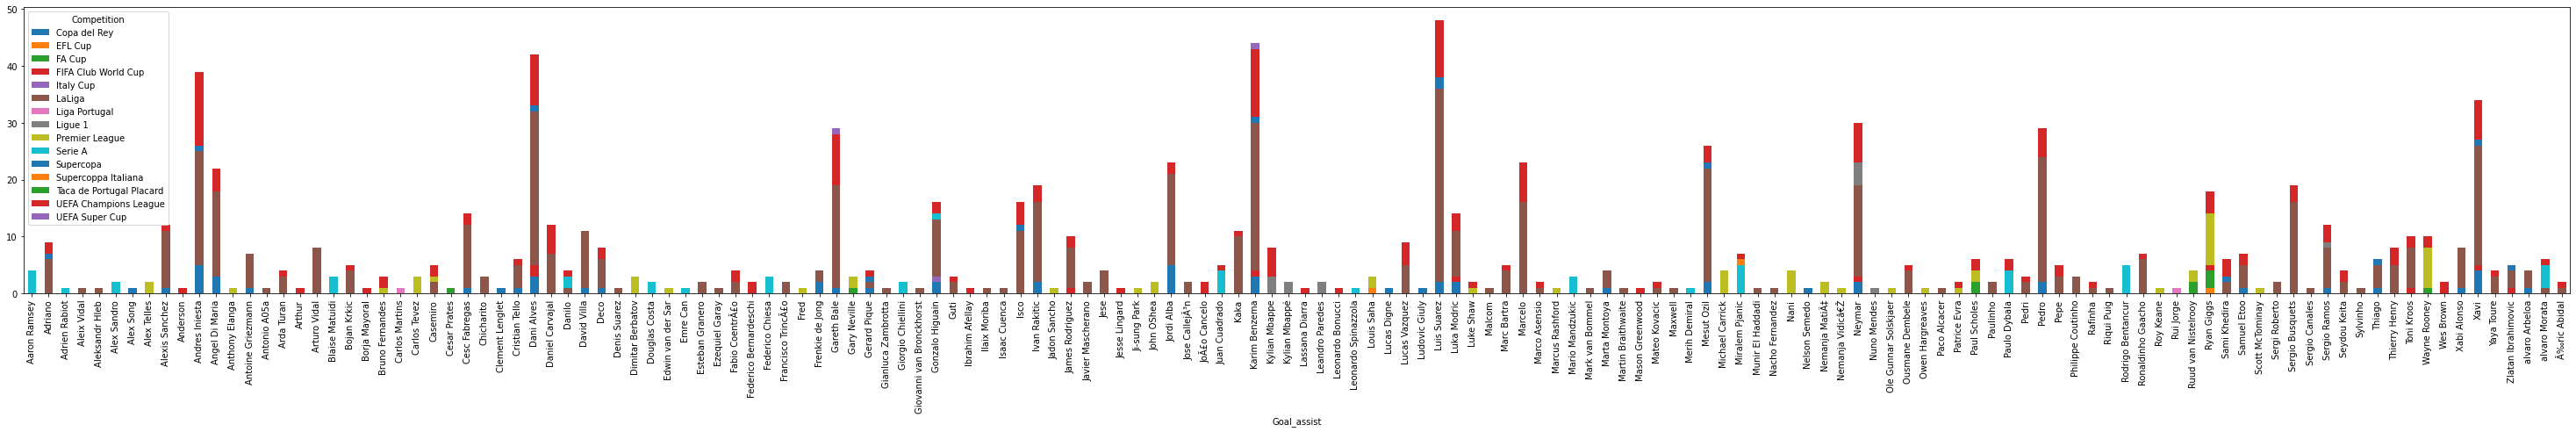

In [98]:
season_messi = data.groupby(['Competition','Goal_assist']).size().reset_index().pivot_table(columns='Competition',index='Goal_assist',values=0)
season_messi.plot(kind = 'bar', stacked = True, figsize = (52, 6));


# The competitions player participated

In [61]:
data['Competition'].replace(['Champions League', 'Troph�e des Champions'], ['UEFA Champions League', 'Trophée des Champions'], inplace = True)
data['Competition'].unique()
# in 2 cases, the same competitions are called differently.

array(['LaLiga', 'UEFA Champions League', 'Copa del Rey', 'Supercopa',
       'FIFA Club World Cup', 'UEFA Super Cup', 'Ligue 1',
       'Trophée des Champions'], dtype=object)

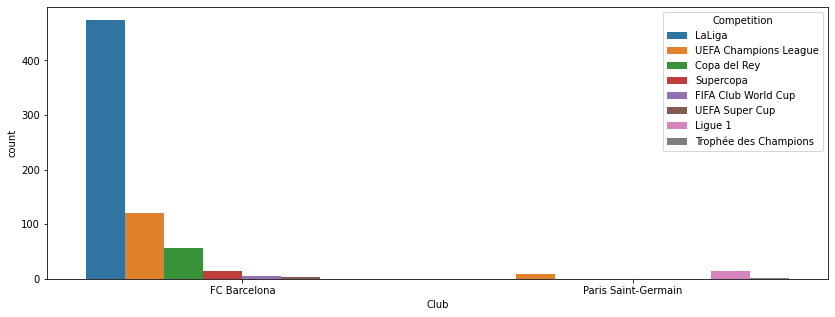

In [62]:
plt.figure(figsize=(14,5))
sns.countplot(x = 'Club', hue='Competition',data=data);
# which competitions th eplayer has scored

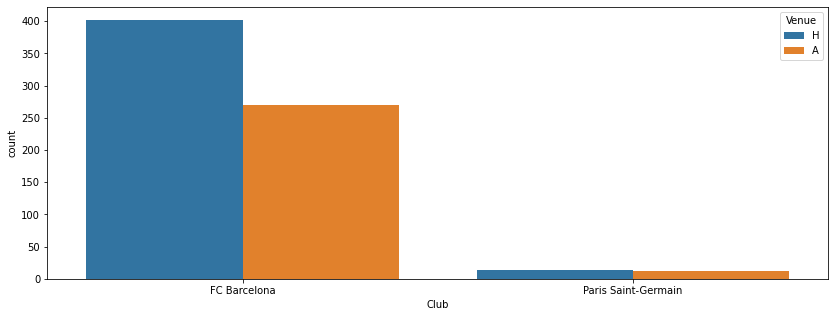

In [63]:
plt.figure(figsize=(14,5))
sns.countplot(x = 'Club', hue = 'Venue', data=data);

# # Top 10 players from the last who helped the player

,Goal_assist,Counts
84,Luis Suarez,48
73,Karim Benzema,44
30,Dani Alves,42
10,Andres Iniesta,39
146,Xavi,34
...,...,...
139,Sylvinho,1
20,Borja Mayoral,1
9,Anderson,1
12,Anthony Elanga,1


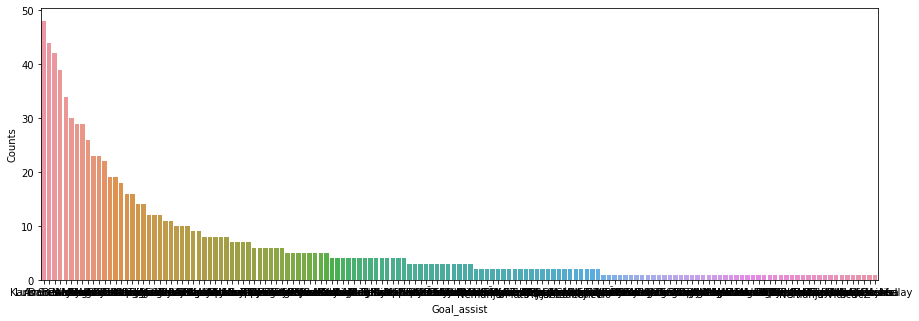

In [118]:
assist_messi = data.groupby(['Goal_assist']).size().reset_index()
assist_messi.rename(columns={0:'Counts'},errors='raise',inplace=True)
assist_messi = assist_messi.sort_values('Counts',ascending=False)
#Top 10 assists to player
display(assist_messi.sort_values('Counts',ascending=False)[:-1])
#assist_messi.plot(kind = 'bar', stacked = True, figsize = (52, 6))
plt.figure(figsize=(15,5))
sns.barplot(x = 'Goal_assist',y = 'Counts',data = assist_messi[:-1]);

# Top 20 players who gave assist to the player

,Goal_assist,Counts
84,Luis Suarez,48
73,Karim Benzema,44
30,Dani Alves,42
10,Andres Iniesta,39
146,Xavi,34
109,Neymar,30
48,Gareth Bale,29
120,Pedro,29
100,Mesut Ozil,26
89,Marcelo,23


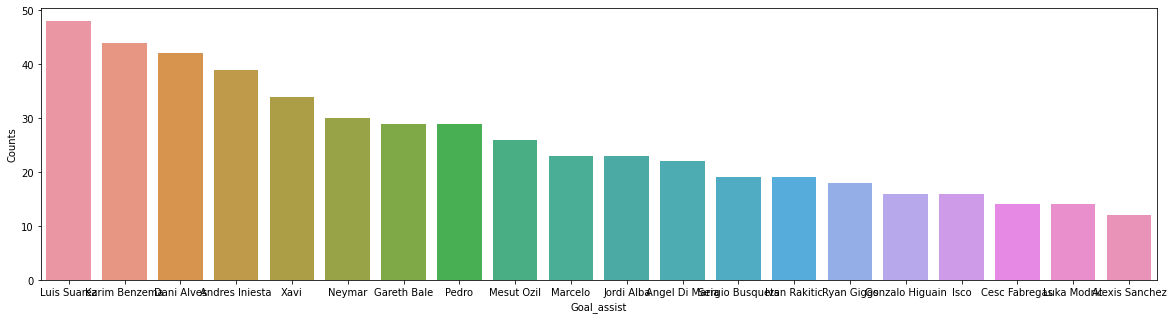

In [116]:
assist_messi = data.groupby(['Goal_assist']).size().reset_index()
assist_messi.rename(columns={0:'Counts'},errors='raise',inplace=True)
assist_messi = assist_messi.sort_values('Counts',ascending=False)
#Top 10 assists to player
display(assist_messi.sort_values('Counts',ascending=False)[:20])

plt.figure(figsize=(20,5))
sns.barplot(x = 'Goal_assist',y = 'Counts',data = assist_messi[:20]);

## Are there situations when the player is in danger in the game?

In [65]:
data['Minute'] = data['Minute'].astype(str).replace(['45+1', '45+2', '45+3', '45+4', '90+1', '90+2', '90+3', '90+4'], ['46', '47', '48', '49', '91', '92', '93', '94']).astype(int)
data.dtypes
# We make our job easier by adding decouples for the time we think is dangerous.
messi_dat_tim_sorted = data.sort_values('Minute')

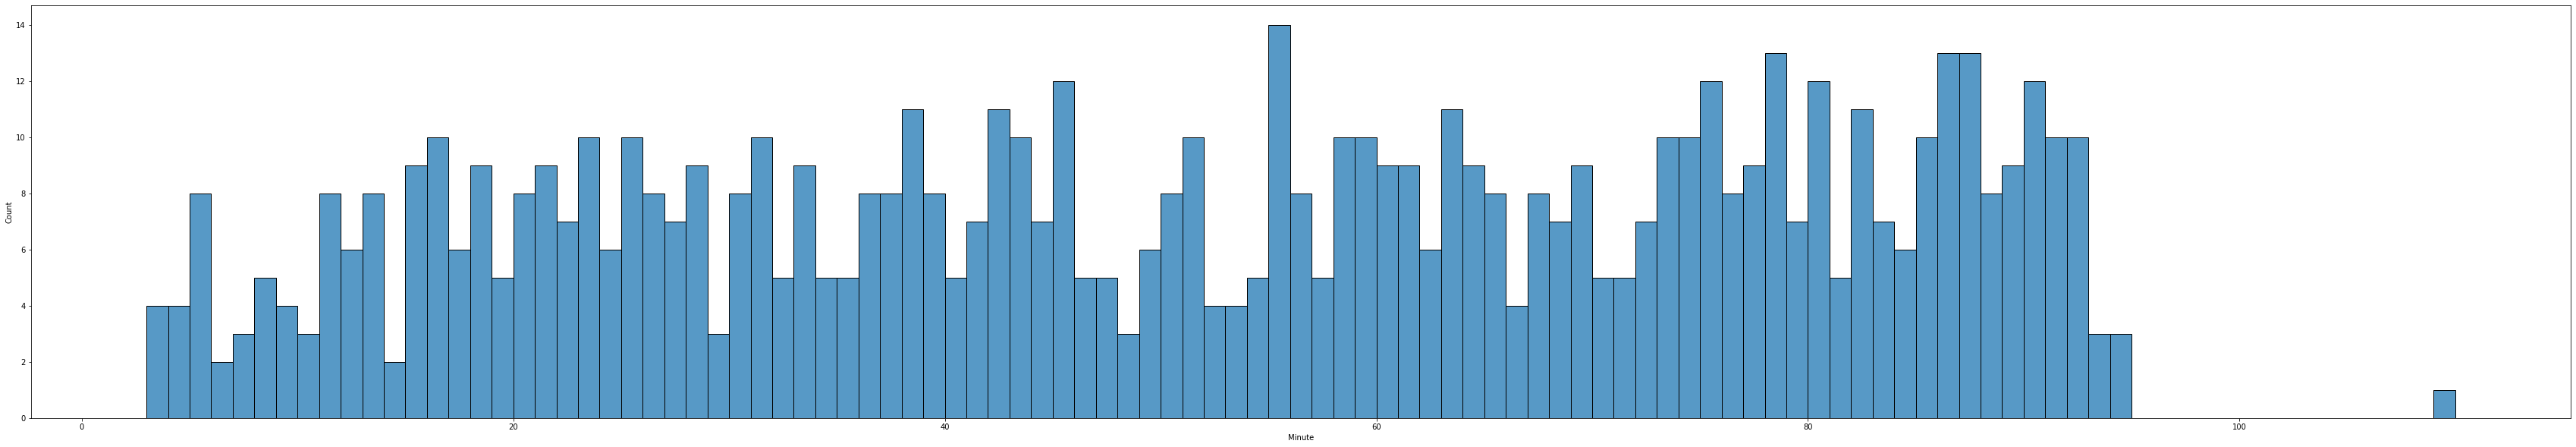

In [66]:
plt.figure(figsize=(60,10))
sns.histplot(messi_dat_tim_sorted['Minute'],binwidth=1);

## We will do the same things in ronaldo

## Reading the data first look cr7 dataset

In [67]:
cr7_data = pd.read_csv("/Users/barborostasdemir/Desktop/Lionel Messi vs Cristiano Ronaldo Club Goals/cr7.csv")

In [119]:
cr7_data.tail(3)
#We take 3 values from the end.

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
698,22/23,Europa League,Group Stage,9/15/22,A,Manchester United,FC Sheriff,0:02,CF,39,0:02,Penalty,NaN
699,22/23,Premier League,10,10/9/22,A,Manchester United,Everton FC,1:2,NaN,44,1:2,Counter attack goal,Casemiro
700,22/23,Europa League,Group Stage,10/27/22,H,Manchester United,FC Sheriff,3:0,CF,81,3:0,Left-footed shot,NaN


In [69]:
cr7_data.describe()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
count,701,701,701,701,701,701,701,701,643,701,701,686,459
unique,21,16,52,464,2,4,125,53,5,106,37,11,86
top,14/15,LaLiga,Group Stage,09-12-15,H,Real Madrid,Sevilla FC,3:00,LW,90,1:00,Right-footed shot,Karim Benzema
freq,61,311,75,5,403,450,27,49,356,17,111,251,44


## Favorite oun position, taking into account the club where the player plays

In [70]:
cr7_data['Playing_Position'].unique()

array(['LW', nan, 'RW', 'CF', 'LW ', 'CF '], dtype=object)

### Droping the rows

In [71]:
cr7_data_md = cr7_data.dropna()
cr7_data_md['Playing_Position'].unique()


array(['LW', 'RW', 'CF', 'LW ', 'CF '], dtype=object)

In [72]:
cr7_data_md.shape

(420, 13)

In [73]:
cr7_data_md['Playing_Position'].replace(['LW ', 'CF '],['LW ', 'CF '], inplace=True)
cr7_data_md['Playing_Position'].unique()
#We do minor data cleaning by grouping the data.

/var/folders/tn/0kn0h9c50d12x3sx_v0jg89w0000gn/T/ipykernel_1776/905023727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cr7_data_md['Playing_Position'].replace(['LW ', 'CF '],['LW ', 'CF '], inplace=True)


array(['LW', 'RW', 'CF', 'LW ', 'CF '], dtype=object)

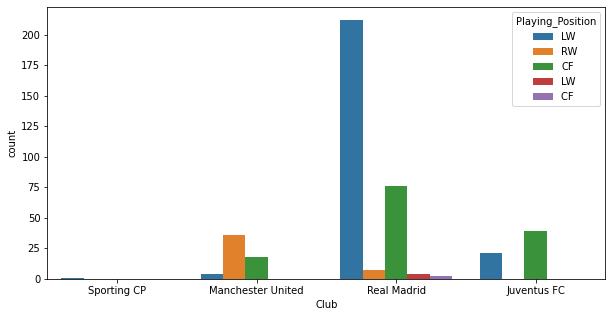

In [74]:
plt.figure(figsize=(10,5))
sns.countplot(x= 'Club',hue = 'Playing_Position',data = cr7_data_md);

In [75]:
cr7_data['Season'].unique()
cr7_data['Season'].replace('Dec-13','12/13',inplace=True)

# We are correcting the season names so that it can be analyzed in a more comfortable way

array(['02/03', '03/04', '04/05', '05/06', '06/07', '07/08', '08/09',
       '09/10', '10/11', '11/12', '12/13', '13/14', '14/15', '15/16',
       '16/17', '17/18', '18/19', '19/20', '20/21', '21/22', '22/23'],
      dtype=object)

In [121]:
cr7_data['Season'].unique()

array(['02/03', '03/04', '04/05', '05/06', '06/07', '07/08', '08/09',
       '09/10', '10/11', '11/12', '12/13', '13/14', '14/15', '15/16',
       '16/17', '17/18', '18/19', '19/20', '20/21', '21/22', '22/23'],
      dtype=object)

/var/folders/tn/0kn0h9c50d12x3sx_v0jg89w0000gn/T/ipykernel_1776/3246800634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cr7_data_md['Season'].replace('Dec-13','12/13',inplace= True)


<Figure size 720x360 with 0 Axes>

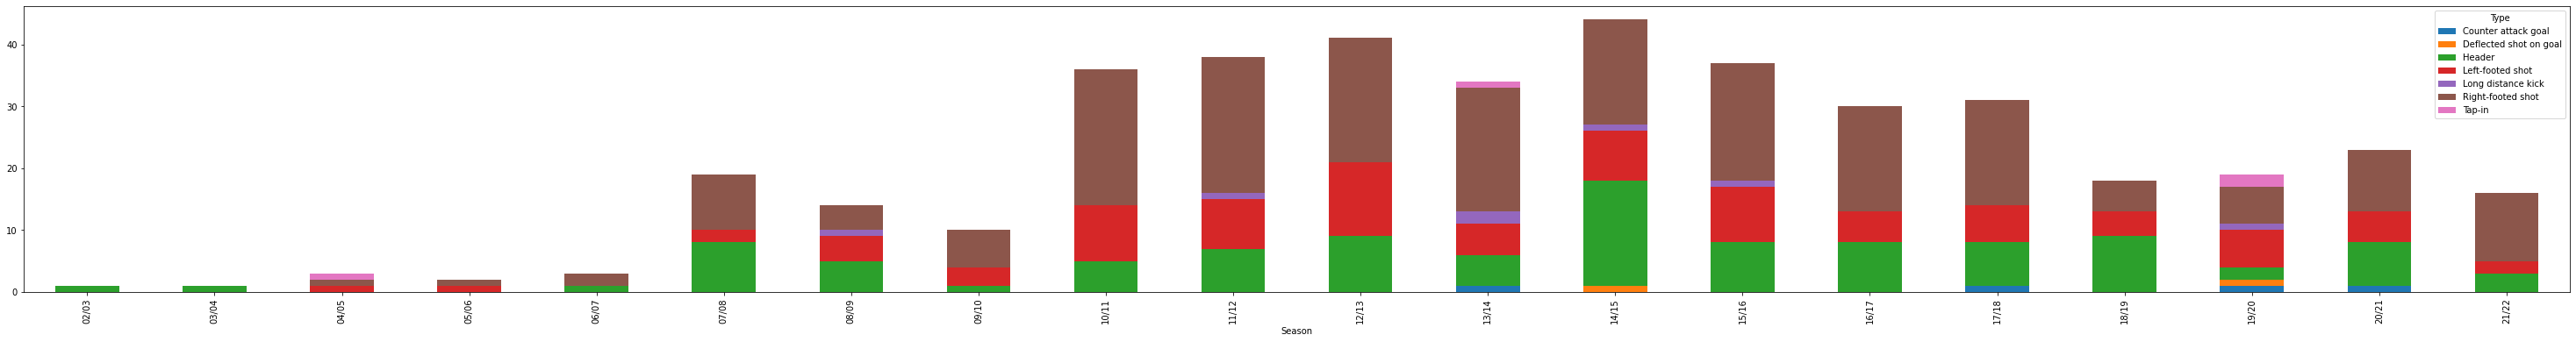

In [76]:
plt.figure(figsize=(10,5));
cr7_data_md['Season'].replace('Dec-13','12/13',inplace= True)
cr7_season = cr7_data_md.groupby(['Season','Type']).size().reset_index().pivot_table(columns='Type', index='Season',values=0);
cr7_season.plot(kind='bar',stacked=True,figsize=(52,6));

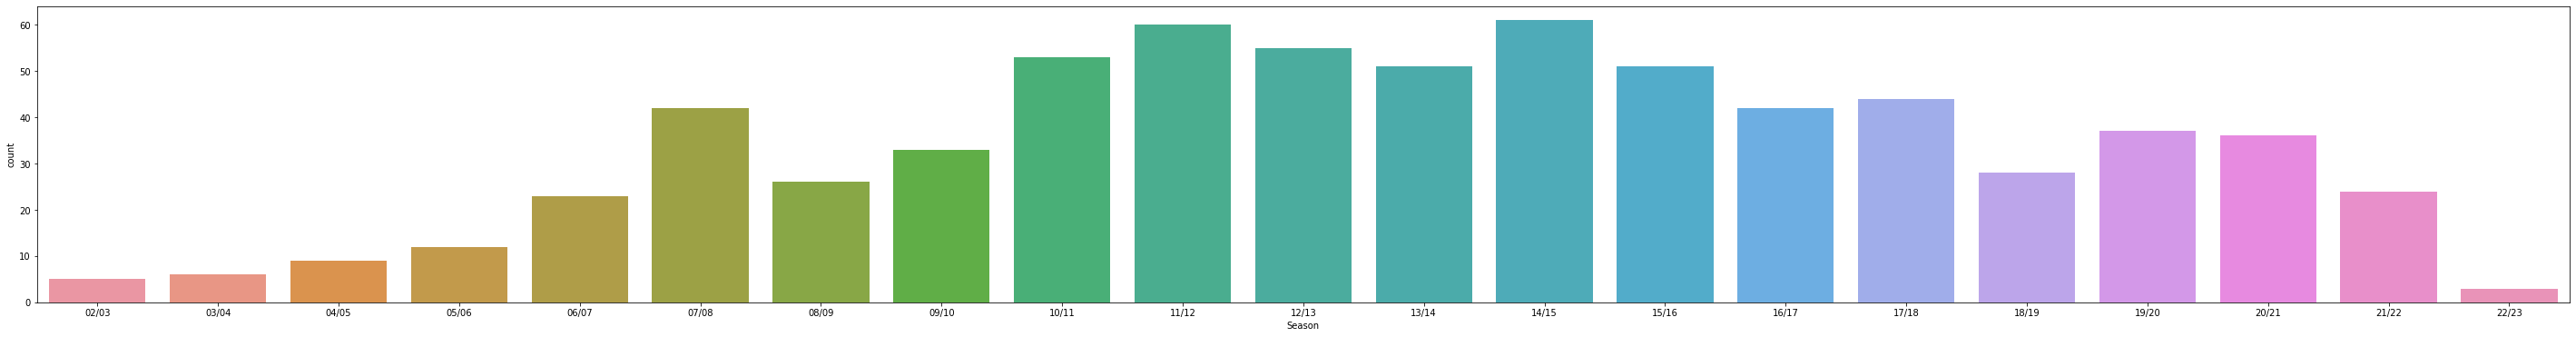

In [122]:
plt.figure(figsize=(50,6))
sns.countplot(x='Season',data= cr7_data);
# we're getting the season chart.

## Which competitions player participated

In [78]:
cr7_data['Competition'].unique()

array(['Liga Portugal', 'Taca de Portugal Placard', 'Premier League',
       'FA Cup', 'UEFA Champions League Qualifying', 'EFL Cup',
       'UEFA Champions League', 'FIFA Club World Cup', 'LaLiga',
       'Copa del Rey', 'Supercopa', 'UEFA Super Cup', 'Serie A',
       'Supercoppa Italiana', 'Italy Cup', 'Europa League'], dtype=object)

In [79]:
cr7_data['Competition'].replace('UEFA Champions League Qualifying','UEFA CHampions League', inplace = True)
cr7_data['Competition'].unique()

array(['Liga Portugal', 'Taca de Portugal Placard', 'Premier League',
       'FA Cup', 'UEFA CHampions League', 'EFL Cup',
       'UEFA Champions League', 'FIFA Club World Cup', 'LaLiga',
       'Copa del Rey', 'Supercopa', 'UEFA Super Cup', 'Serie A',
       'Supercoppa Italiana', 'Italy Cup', 'Europa League'], dtype=object)

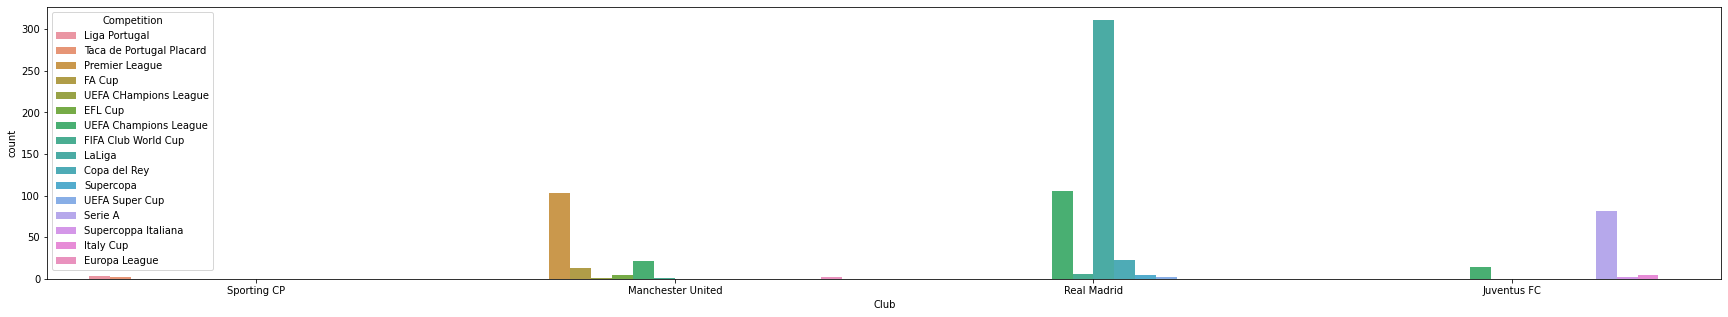

In [80]:
plt.figure(figsize=(30,5))
sns.countplot(x = 'Club', hue = 'Competition', data  = cr7_data);

# Top 5 players who gave assist to the player

,Goal_assist,Counts
43,Karim Benzema,44
27,Gareth Bale,29
58,Mesut Ozil,26
51,Marcelo,23
5,Angel Di Maria,22


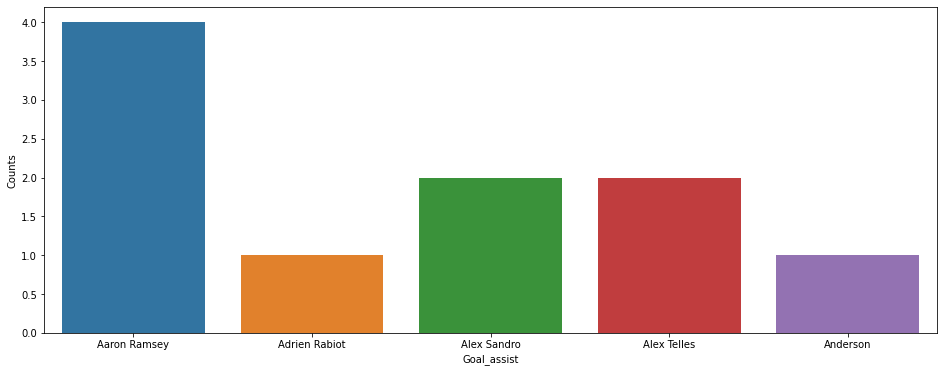

In [124]:
assist_cr7 = cr7_data.groupby(['Goal_assist']).size().reset_index()
# First, the total size of the target assist values is "assist_cr7"
assist_cr7.rename(columns={0:'Counts'}, errors = 'raise',inplace = True)
display(assist_cr7.sort_values('Counts',ascending=False)[:5])
plt.figure(figsize = (16, 6))
sns.barplot(x = 'Goal_assist', y = 'Counts', data = assist_cr7[:5]);


## Periods when players are dangerous

In [82]:
cr7_data['Minute'].unique()

array(['34', '90+5', '88', '67', '13', '80', '74', '89', '60', '4', '44',
       '87', '9', '8', '54', '58', '45+1', '21', '76', '63', '90', '12',
       '68', '14', '38', '45', '59', '23', '19', '73', '82', '10', '39',
       '84', '85', '47', '50', '77', '49', '28', '5', '62', '51', '41',
       '35', '90+3', '22', '81', '48', '70', '90+2', '69', '56', '79',
       '16', '53', '3', '24', '32', '26', '25', '30', '43', '65', '11',
       '6', '57', '61', '17', '27', '1', '75', '2', '64', '71', '18',
       '78', '29', '36', '15', '55', '86', '90+1', '72', '20', '42',
       '103', '46', '52', '90+4', '37', '66', '90+6', '31', '40', '120',
       '83', '7', '33', '97', '104', '105', '109', '90+7', '45+7', '45+2'],
      dtype=object)

## Which data minute

In [83]:
cr7_data['Minute'] = cr7_data['Minute'].astype(str).replace(['45+1', '45+2', '45+3', '45+4', '45+6', '45+7', '90+1', '90+2', '90+3', '90+4', '90+5', '90+6', '90+7'], ['46', '47', '48', '49', '51', '52', '91', '92', '93', '94', '95', '96', '97']).astype(int)

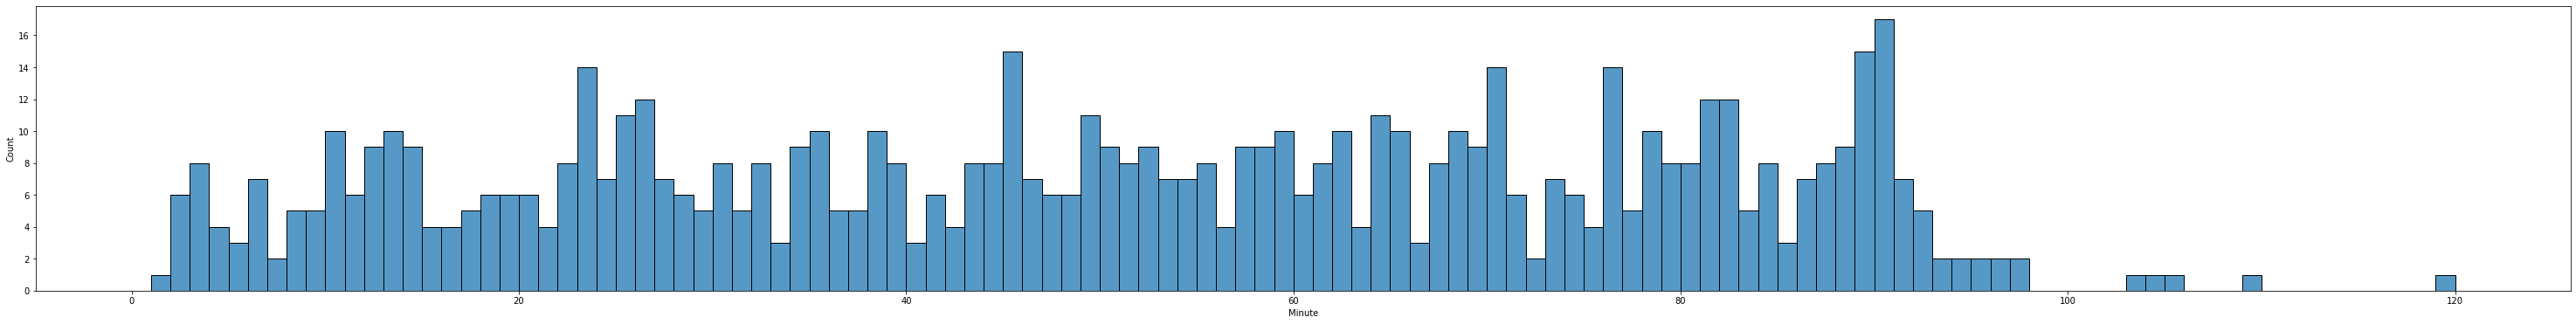

In [84]:
cr7_data.dtypes
cr7_data_md_sorted = cr7_data.sort_values('Minute')
plt.figure(figsize=(52, 6))
sns.histplot(cr7_data_md_sorted['Minute'], binwidth = 1);

### Messi- Ronaldo Comparison

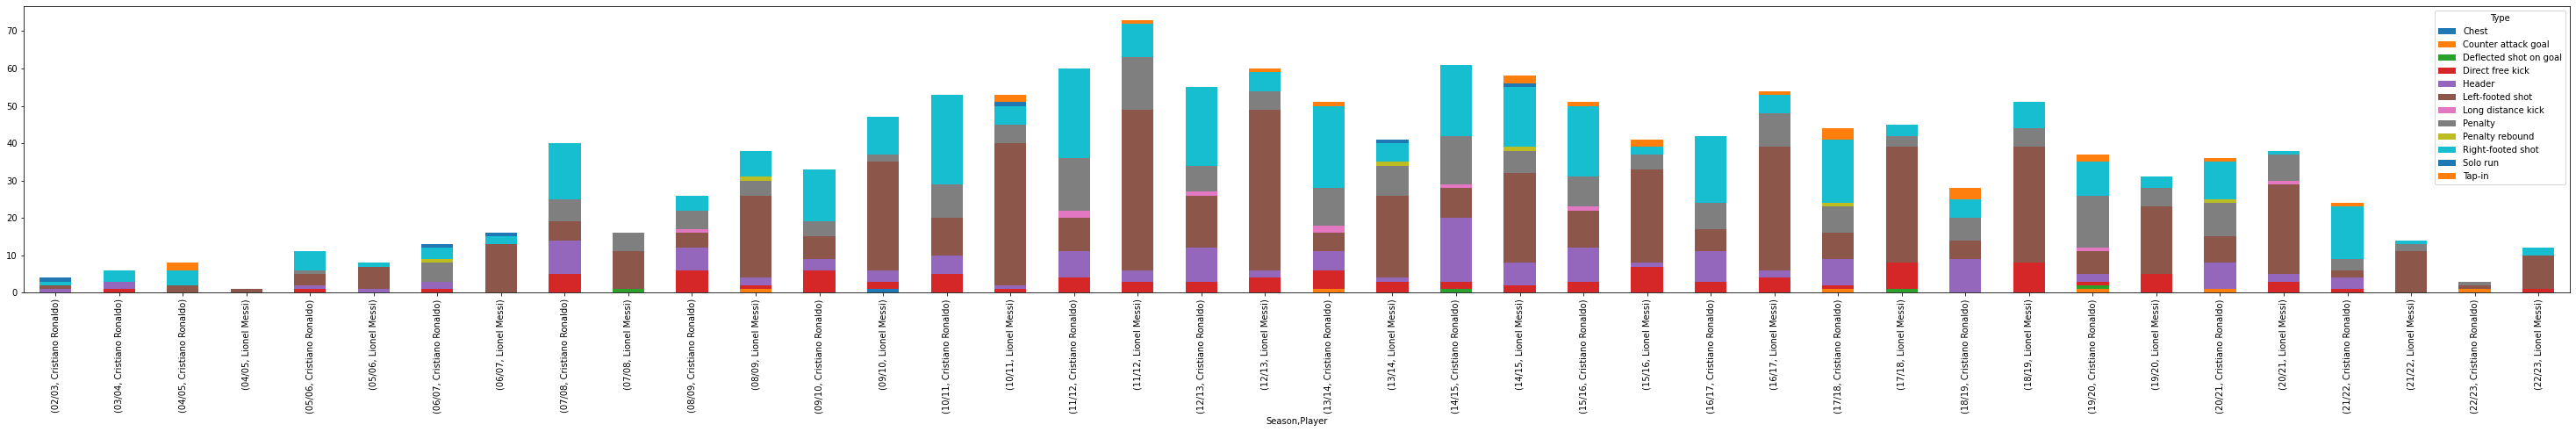

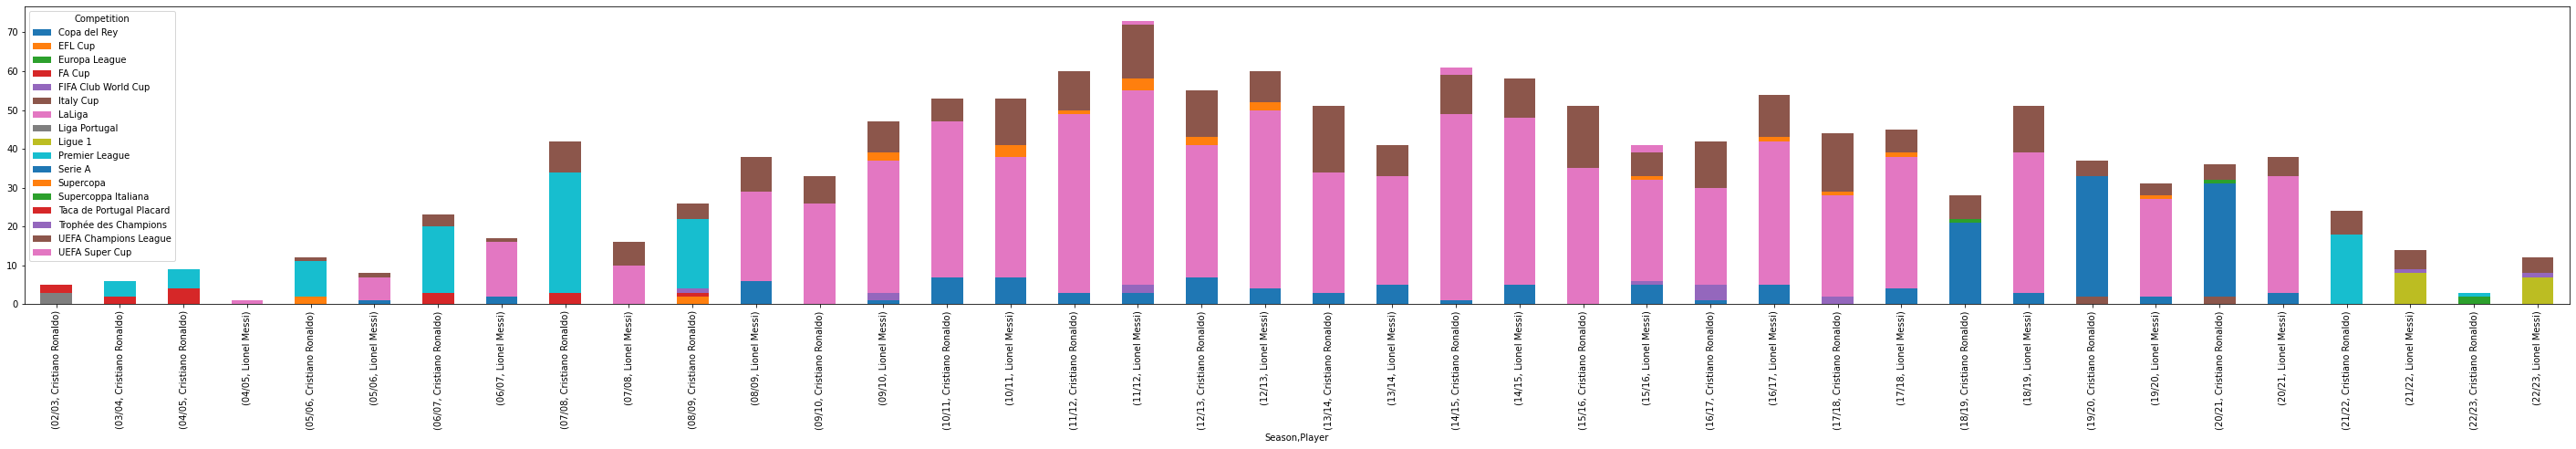

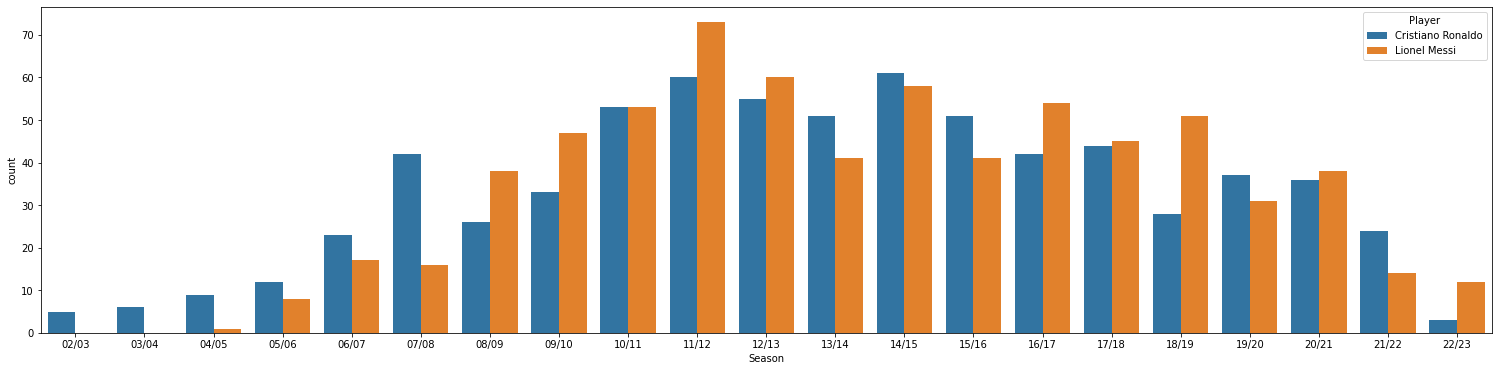

In [85]:
data = pd.read_csv('/Users/barborostasdemir/Desktop/Lionel Messi vs Cristiano Ronaldo Club Goals/data.csv')
data['Season'].replace(['Dec-13','11-Dec'],['12/13','11/12'],inplace=True)
data['Season'].unique()
# minor data prepartion
data['Competition'].replace(['UEFA Champions League Qualifying', 'Champions League', 'Troph�e des Champions'],['UEFA Champions League', 'UEFA Champions League', 'Trophée des Champions'], inplace = True)



season_type = data.groupby(['Player','Season','Type']).size().reset_index().pivot_table(columns='Type',index=['Season','Player'],values=0)

season_type.plot(kind = 'bar', stacked = True, figsize = (52,6));

season_compet = data.groupby(['Player','Season','Competition']).size().reset_index().pivot(columns='Competition',index= ['Season','Player'],values=0)
season_compet.plot(kind='bar',stacked=True, figsize=(50,6));

plt.figure(figsize=(26,6))
sns.countplot(x = 'Season',hue = 'Player', data = data);